This is code for KMeans Clustering of time series data using Dynamic Time Warping (DTW). Patient vitals, labs and dx were combined from ICU data. Each .csv file is by hour and each patient has 4 time points (15-minute intervals) within that hour where data is recorded.

In [1]:
# import packages

import os
import pandas as pd
from glob import glob 
import numpy as np
import time
import math
import impyute as impy

from tslearn.utils import to_time_series
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


In [ ]:
# read and append vitals data

os.chdir("/path")
strain = glob("*.csv")

vitals = pd.DataFrame()

for filename in strain:
    df = pd.read_csv(filename) 
    vitals = vitals.append(df)

In [ ]:
#vitals.to_csv('/path/vitals.csv') # write to .csv
#vitals = pd.read_csv('/path/vitals.csv') # upload
vitals.shape

In [ ]:
## read and append labs data

os.chdir("/path")
strain = glob("*.csv")

labs = pd.DataFrame()

for filename in strain:
    df = pd.read_csv(filename)
    labs = labs.append(df)

In [ ]:
#labs.to_csv('/path/labs.csv')
#labs = pd.read_csv('/path/labs.csv')
labs.shape

In [ ]:
# read and append dx data

os.chdir("/path")
strain = glob("*.csv")

dx = pd.DataFrame()

for filename in strain:
    df = pd.read_csv(filename)
    dx = dx.append(df)

In [ ]:
#dx.to_csv('/path/dx.csv')
#dx = pd.read_csv('/path/dx.csv')
dx.shape

In [ ]:
# merge data for KMeans clustering and prediction

vl = pd.merge(vitals, labs, on = ['feature1', 'feature2', 'feature3'], how = 'left')
X = pd.merge(vl, dx, on = ['feature1', 'feature2'], how = 'left')

In [ ]:
#X.to_csv('/path/X.csv')
#X = pd.read_csv('/path/X.csv')
X.shape

In [ ]:
# pre-format dataframe

# unsupervised
X.drop_duplicates(inplace = True)
X.drop(columns = ['a', 'b', 'c'], inplace = True)
X.astype({'d': 'int', 'e': 'int', 'f': 'int'})
X.dropna(axis = 1, thresh = n, inplace = True)
X = X.sort_values(by = ['feature1', 'feature2'])

# make X and y dataset split
#y = X.pop('label')

In [7]:
# prepare for imputation

Xv = X.values # make an array
Xv = impy.median(Xv)

# convert back to dataframe
X = pd.DataFrame(Xv, columns = X.columns.values.tolist())
X.fillna(method='ffill')

,patientunitstayid,min15_slot,infection_hr,organ_dysfunction_hr,angus_sepsis_ind,explicit_sepsis_ind,los_hrs
0,141168.0,24.0,0.0,0.0,0.0,0.0,59.0
1,141168.0,25.0,0.0,0.0,0.0,0.0,59.0
2,141168.0,26.0,0.0,0.0,0.0,0.0,59.0
3,141168.0,27.0,0.0,0.0,0.0,0.0,59.0
4,141168.0,44.0,0.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...
83995,147671.0,1067.0,0.0,0.0,0.0,0.0,51.0
83996,147671.0,1076.0,0.0,0.0,0.0,0.0,51.0
83997,147671.0,1077.0,0.0,0.0,0.0,0.0,51.0
83998,147671.0,1078.0,0.0,0.0,0.0,0.0,51.0


In [8]:
# make 3D [pt,ts,d] numpy array for KMeans

km_arr=np.zeros((patient, time_series, features))

i = 0
j = 0
k = time_seris
for x in range(1000):
    km_arr[i] = X.iloc[range(j, k)].values
    i += 1
    j += time_series
    k += time_series

In [9]:
#DTW K-means sqrt n clusters

# timer
start = time.time()

#K-means
km = TimeSeriesKMeans(n_clusters=30, metric = 'dtw', verbose=True, random_state=42)

y_pred = km.fit_predict(km_arr)

# timer
end = time.time()
print(end - start)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

898473.344 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:   12.7s finished


717216.809 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:   12.8s finished


702296.365 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:   12.4s finished


696855.895 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:   12.4s finished


694371.569 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:   12.3s finished


693817.982 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:   12.4s finished


693770.430 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:   12.4s finished


693770.430 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


188.5202338695526


[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:   12.5s finished


In [10]:
# Unique counts per cluster

unique, counts = np.unique(y_pred, return_counts=True)
print(unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] [44 31 46 45 55 34  6 42 49 53 18 23 41 55 30 40 45  3 29 42 30 42 32 46
 49  2 31  2 32  3]


In [15]:
# labels

y_pred

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 28, 28, 28,
       28, 28, 28, 28, 28, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 25, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 25,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26

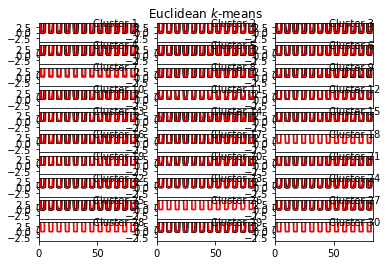

In [19]:
# visualize the clusters

sz = km_arr.shape[1]

plt.figure()
for yi in range(30):
    plt.subplot(10, 3, yi + 1)
    for xx in km_arr[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [ ]:
# silhouette_score

silhouette_score(km_arr, km.labels_)